In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image, ImageOps

In [2]:
image = cv2.imread('tv.jpg', cv2.IMREAD_GRAYSCALE)
image.shape

(372, 620)

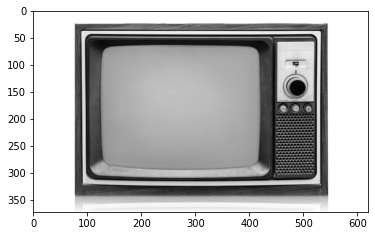

In [3]:
plt.imshow(image, cmap='gray')

### Main code

In [7]:
def sp_noise(image, prob):

    output = Image.new('L', image.size)
    pixels_out = output.load()
    thres = 1 - prob
    pixels = image.load()
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            rdn = random.random()
            if rdn < prob:
                pixels_out[i, j] = 0
            elif rdn > thres:
                pixels_out[i, j] = 255
            else:
                pixels_out[i, j] = pixels[i, j]
    return output

In [ ]:
images = []

for i in range(0, 20):

    im = Image.open('tv.jpg').convert('L')
    # im = ImageOps.grayscale(im)
    roi = im.crop((120, 60, 420, 290))

    roi_noisy = sp_noise(roi, random.uniform(0.2, 0.3))
    print(i)
    im.paste(roi_noisy, (120, 60))

    im = ImageOps.colorize(im, black ="black", white ="white")

    images.append(im)

images[0].save('TV.gif', save_all=True, append_images=images[1:], optimize=False, duration=10, loop=0)